ANÁLISIS DE LA CARTERA MOROSA EN SUCURSALES - BANCO NACION ARGENTINA -

Para arrancar voy a importar las librerias que voy a  utilizar.-

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Extraigo el archivo que contiene la base de datos a analizar y la almaceno en un df.-

In [2]:
df=pd.read_excel(r"C:\Users\Agustín\Desktop\Base para GitHub\Analisis Mora\Analisis Mora Bna1.xlsx")

In [3]:
df.head()

,Numero_Cliente,Codigo_Sucursal,Nombre_Sucursal,VTO.,Atraso,Cartera,Sit.,Desc_Actividad,Grupo_Actividad,Sector_Actividad,Segmentacion,Deuda_Pesificada
0,10001,1046,ALTA CORDOBA,2022-12-01,30,2,1,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA INACTIVA PREVISIO,316007.96
1,10002,1046,ALTA CORDOBA,2022-11-09,52,2,2,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA ABIERTA,287595.70
2,10003,1046,ALTA CORDOBA,2022-12-01,30,2,1,PERSONAS FIS.QUE DESARROLLEN ALGUNA ACTIV.,FAMILIAS,NO CLASIFICADO,CARTERA INACTIVA HABERES,232587.05
3,10004,1046,ALTA CORDOBA,2022-11-23,38,2,2,JUBILADOS Y PENSIONADOS,FAMILIAS,NO CLASIFICADO,CARTERA PREVISIONAL,174700.00
4,10005,1046,ALTA CORDOBA,2022-11-09,52,2,2,ACTIVIDADES DIVERSAS NO CLASIFICADAS EN OTRA P...,OTROS,NO CLASIFICADO,CARTERA ABIERTA,159177.00


In [4]:
df.describe()

,Numero_Cliente,Codigo_Sucursal,Atraso,Cartera,Sit.,Deuda_Pesificada
count,128.000000,128.000000,128.000000,128.000000,128.000000,1.280000e+02
mean,10064.500000,4277.796875,60.640625,2.023438,1.898438,2.741734e+05
std,37.094474,3534.674346,17.447214,0.151883,0.303259,1.772446e+05
min,10001.000000,1046.000000,30.000000,2.000000,1.000000,1.500998e+05
25%,10032.750000,1570.000000,52.000000,2.000000,2.000000,1.663924e+05
50%,10064.500000,2107.500000,52.000000,2.000000,2.000000,1.981500e+05
75%,10096.250000,9201.250000,80.000000,2.000000,2.000000,2.878747e+05
max,10128.000000,9261.000000,88.000000,3.000000,2.000000,1.103900e+06


In [5]:
df['Nombre_Sucursal'].unique()

array(['ALTA CORDOBA', 'ALTA GRACIA', 'AVDA. HUMBERTO I',
       'BARR.LOS NARANJOS', 'BARRIO SAN VICENTE', 'CORDOBA', 'COSQUIN',
       'CRUZ DEL EJE', 'DEAN FUNES', 'JESUS MARIA', 'LA FALDA',
       'LAGUNA LARGA', 'MINA CLAVERO', 'MONTE CRISTO', 'RIO SEGUNDO',
       'UNQUILLO', 'VILLA CARLOS PAZ', 'VILLA DOLORES',
       'V. GRAL. BELGRANO', 'BARR.C.DE L/ROSAS', 'BARRIO SAN MARTIN',
       'AV.SABATTINI', 'AV.JUAN B.JUSTO', 'BARR.ALTO ALBERDI',
       'AV.VELEZ SARSFIELD'], dtype=object)

Voy a contar la cantidad de registros que tiene la base de datos para tener una referencia.-

In [6]:
df['Numero_Cliente'].count()

128

Controlo que no haya valores nulos en el df.-

In [7]:
df.isnull().sum()        

Numero_Cliente      0
Codigo_Sucursal     0
Nombre_Sucursal     0
VTO.                0
Atraso              0
Cartera             0
Sit.                0
Desc_Actividad      0
Grupo_Actividad     0
Sector_Actividad    0
Segmentacion        0
Deuda_Pesificada    0
dtype: int64

Creo un nuevo data frame con los datos agrupados de cantidad de clientes en mora por sucursal.-

In [8]:
cant_suc=df.groupby(by='Nombre_Sucursal').Numero_Cliente.count()
cant_suc


Nombre_Sucursal
ALTA CORDOBA           5
ALTA GRACIA            5
AV.JUAN B.JUSTO       13
AV.SABATTINI           5
AV.VELEZ SARSFIELD     7
AVDA. HUMBERTO I       5
BARR.ALTO ALBERDI      4
BARR.C.DE L/ROSAS     10
BARR.LOS NARANJOS      8
BARRIO SAN MARTIN      3
BARRIO SAN VICENTE     2
CORDOBA               32
COSQUIN                3
CRUZ DEL EJE           1
DEAN FUNES             1
JESUS MARIA            2
LA FALDA               1
LAGUNA LARGA           1
MINA CLAVERO           1
MONTE CRISTO           2
RIO SEGUNDO            6
UNQUILLO               3
V. GRAL. BELGRANO      1
VILLA CARLOS PAZ       4
VILLA DOLORES          3
Name: Numero_Cliente, dtype: int64

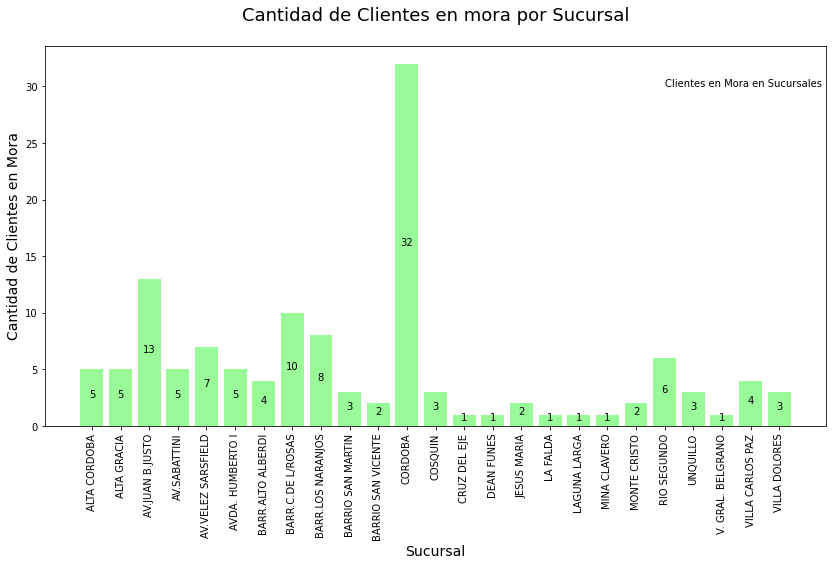

In [9]:
#Creo el gráfico y seteo el tamaño:
plt.figure(figsize=(14,7))

#Elijo el tipo de gráfico con los datos, el color y la opacidad, entre otros.
plt.bar(cant_suc.index,cant_suc, color='palegreen')


#Elijo los títulos de los ejes con sus estilos:
plt.ylabel('Cantidad de Clientes en Mora', size=14)
plt.xlabel('Sucursal', size=14)
plt.title('Cantidad de Clientes en mora por Sucursal', size=18, pad=25)

#Ajustes adicionales:
plt.grid(False)
plt.xticks(rotation=90)
def add_value_label(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center")
        
add_value_label(cant_suc.index,cant_suc)       
plt.annotate("Clientes en Mora en Sucursales", (20, 30))


#Mostar el gráfico:
plt.show();

Creo un df con los promedios de los valores de la deuda en $ y otro con los dias de atraso.-

In [10]:
prom_suc=round(df.groupby(by='Nombre_Sucursal').Deuda_Pesificada.mean(),2)
prom_suc

Nombre_Sucursal
ALTA CORDOBA          234013.54
ALTA GRACIA           284120.85
AV.JUAN B.JUSTO       197640.08
AV.SABATTINI          234219.65
AV.VELEZ SARSFIELD    241479.89
AVDA. HUMBERTO I      252565.30
BARR.ALTO ALBERDI     240577.53
BARR.C.DE L/ROSAS     261168.30
BARR.LOS NARANJOS     292279.31
BARRIO SAN MARTIN     304115.03
BARRIO SAN VICENTE    396857.15
CORDOBA               309204.89
COSQUIN               182755.67
CRUZ DEL EJE          152000.00
DEAN FUNES            277811.00
JESUS MARIA           754381.29
LA FALDA              165482.00
LAGUNA LARGA          504075.50
MINA CLAVERO          155100.00
MONTE CRISTO          256003.09
RIO SEGUNDO           230342.77
UNQUILLO              163711.97
V. GRAL. BELGRANO     154022.40
VILLA CARLOS PAZ      294989.80
VILLA DOLORES         422133.50
Name: Deuda_Pesificada, dtype: float64

In [11]:
atraso_suc=round(df.groupby(by='Nombre_Sucursal').Atraso.mean(),2)
atraso_suc

Nombre_Sucursal
ALTA CORDOBA          40.40
ALTA GRACIA           49.60
AV.JUAN B.JUSTO       67.46
AV.SABATTINI          63.20
AV.VELEZ SARSFIELD    62.14
AVDA. HUMBERTO I      54.80
BARR.ALTO ALBERDI     50.00
BARR.C.DE L/ROSAS     65.40
BARR.LOS NARANJOS     58.12
BARRIO SAN MARTIN     75.33
BARRIO SAN VICENTE    52.00
CORDOBA               59.81
COSQUIN               63.67
CRUZ DEL EJE          80.00
DEAN FUNES            80.00
JESUS MARIA           58.50
LA FALDA              52.00
LAGUNA LARGA          87.00
MINA CLAVERO          31.00
MONTE CRISTO          58.50
RIO SEGUNDO           55.50
UNQUILLO              70.67
V. GRAL. BELGRANO     80.00
VILLA CARLOS PAZ      58.50
VILLA DOLORES         77.67
Name: Atraso, dtype: float64

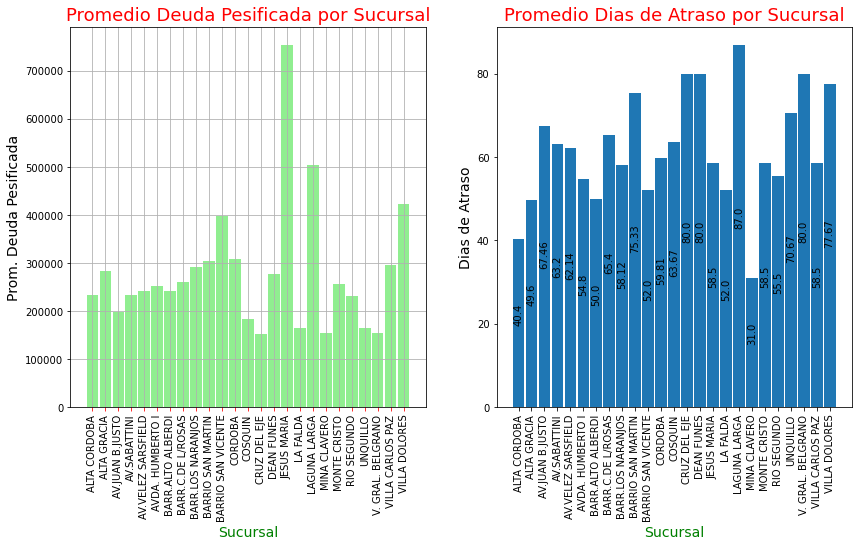

In [12]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(14,7))
ax1.bar(prom_suc.index, prom_suc, color='lightgreen',width=0.9)
ax1.set_xlabel('Sucursal', size=14, color='green')
ax1.set_ylabel('Prom. Deuda Pesificada', size=14)
ax1.set_title('Promedio Deuda Pesificada por Sucursal', size=18, color='red')
ax1.tick_params(axis='x', color='r', rotation=90)
def add_value_label_1(x_list,y_list):
    for i in range(0, len(x_list)):
        plt.text(i,y_list[i]/2,y_list[i], ha="center", rotation=90)
ax1.grid(True)

ax2.bar(atraso_suc.index, atraso_suc,width=0.9)
plt.xlabel('Sucursal', size=14, color='green')
plt.ylabel('Dias de Atraso', size=14)
plt.title('Promedio Dias de Atraso por Sucursal', size=18, color='red')
plt.xticks(rotation=90)
add_value_label_1(atraso_suc.index,atraso_suc)

plt.show()

        

In [13]:
df_def=pd.concat([cant_suc,prom_suc,atraso_suc],axis=1, join='inner')
df_def

,Numero_Cliente,Deuda_Pesificada,Atraso
Nombre_Sucursal,,,
ALTA CORDOBA,5,234013.54,40.40
ALTA GRACIA,5,284120.85,49.60
AV.JUAN B.JUSTO,13,197640.08,67.46
AV.SABATTINI,5,234219.65,63.20
AV.VELEZ SARSFIELD,7,241479.89,62.14
AVDA. HUMBERTO I,5,252565.30,54.80
BARR.ALTO ALBERDI,4,240577.53,50.00
BARR.C.DE L/ROSAS,10,261168.30,65.40
BARR.LOS NARANJOS,8,292279.31,58.12


In [14]:
df_def.rename(columns = {'Numero_Cliente':'Cantidad_Clientes'}, inplace = True)
df_def

,Cantidad_Clientes,Deuda_Pesificada,Atraso
Nombre_Sucursal,,,
ALTA CORDOBA,5,234013.54,40.40
ALTA GRACIA,5,284120.85,49.60
AV.JUAN B.JUSTO,13,197640.08,67.46
AV.SABATTINI,5,234219.65,63.20
AV.VELEZ SARSFIELD,7,241479.89,62.14
AVDA. HUMBERTO I,5,252565.30,54.80
BARR.ALTO ALBERDI,4,240577.53,50.00
BARR.C.DE L/ROSAS,10,261168.30,65.40
BARR.LOS NARANJOS,8,292279.31,58.12


In [15]:
df_def['Deuda_Total_Suc']=round(df_def['Deuda_Pesificada']*df_def['Cantidad_Clientes'],2)
df_def

,Cantidad_Clientes,Deuda_Pesificada,Atraso,Deuda_Total_Suc
Nombre_Sucursal,,,,
ALTA CORDOBA,5,234013.54,40.40,1170067.70
ALTA GRACIA,5,284120.85,49.60,1420604.25
AV.JUAN B.JUSTO,13,197640.08,67.46,2569321.04
AV.SABATTINI,5,234219.65,63.20,1171098.25
AV.VELEZ SARSFIELD,7,241479.89,62.14,1690359.23
AVDA. HUMBERTO I,5,252565.30,54.80,1262826.50
BARR.ALTO ALBERDI,4,240577.53,50.00,962310.12
BARR.C.DE L/ROSAS,10,261168.30,65.40,2611683.00
BARR.LOS NARANJOS,8,292279.31,58.12,2338234.48


Para verificar los valores de la columna antes creada se puede consultar de la base inicial el total filtrandolo por sucursal
Por ejemplo elijo la Sucursal ALTA CORDOBA

In [17]:
df[df['Nombre_Sucursal']=='ALTA CORDOBA'].Deuda_Pesificada.sum()

1170067.71